In [95]:
import matplotlib.pyplot as plt
import numpy as np
import scipy


Modelo Ising 1D

In [99]:
#Definimos parametros

J = 1
nEspines = 100
kBT = 5

#Iniciamos el arreglo de entradas
arregloEspines = np.ones(nEspines)
arregloEspines = arregloEspines * 1/2
estados = arregloEspines
estados  = np.concatenate(([estados],[arregloEspines]), axis=0)

def definirParametrosGlobales(J1 = 1,nEspines1 = 100, kBT1 = 1, orinentacion = 1 ):
    global J
    global nEspines
    global kBT
    global estados
    global arregloEspines
    J = J1
    nEspines = nEspines1
    kBT = kBT1
    if orinentacion == 1:
        arregloEspines = np.ones(nEspines)
        arregloEspines = arregloEspines * 1/2
    elif orinentacion == 2:
        arregloEspines = np.ones(nEspines)
        arregloEspines = arregloEspines * -1/2
    else:
        arregloEspines = np.random.choice(a = [1/2, -1/2], size=nEspines)
    estados = arregloEspines
    estados  = np.concatenate(([estados],[arregloEspines]), axis=0)



In [100]:
def calculoDeEnergia(arregloEspines):
    energiaVector = 0
    for i in range(arregloEspines.size-1):
        if i == arregloEspines.size-1:
            energiaVector += arregloEspines[i] * arregloEspines[0]
        else:
            energiaVector += arregloEspines[i] * arregloEspines[i+1]

    return -J    * energiaVector


def cambioEspin():
    espin = np.random.randint(low = 0, high = nEspines-1)
    return espin


def calculoDeltaE():
    estado1 = estados[-1]
    estado2 = estados[-1]
    espinAleatorio = cambioEspin()
    estado2[espinAleatorio] =  estado2[espinAleatorio] * -1
    energia1 = calculoDeEnergia(estado1)
    energia2 = calculoDeEnergia(estado2)
    deltaE = energia2 - energia1
    return deltaE, estado2, estado1


#Algoritmo Metropolis
def nuevoEstado():
    global estados
    deltaE, estadoPosible, estadoViejo = calculoDeltaE()
    if deltaE >= 0:
        estados = np.concatenate((estados, [estadoPosible]), axis=0)
    elif metropolisAuxiliar(deltaE):
        estados = np.concatenate((estados, [estadoPosible]), axis=0)
    else:
        estados = np.concatenate((estados, [estadoViejo]), axis=0)


def metropolisAuxiliar(deltaE):
    numeroAleatorio = np.random.random()
    R = np.exp(-deltaE / kBT)
    if numeroAleatorio <= R:
        return True
    else:
        return False

def graficarPasos(numeroPasos):
    for i in range(numeroPasos):
        nuevoEstado()
    fig, ax = plt.subplots(dpi = 100)
    ax.matshow(np.transpose(estados))
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.show()

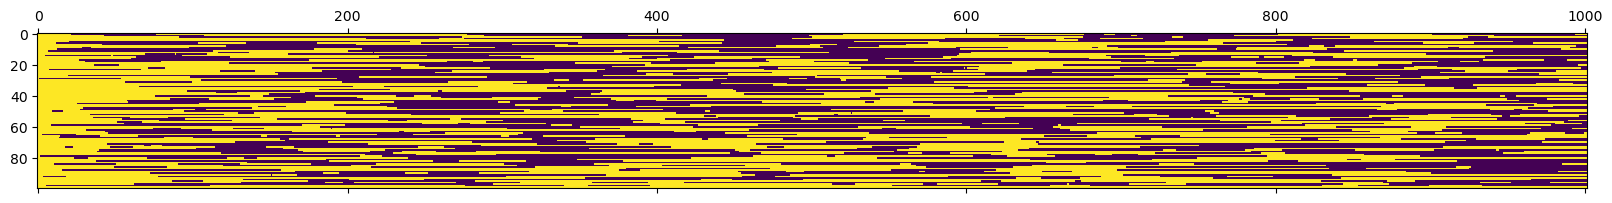

In [101]:
graficarPasos(1000)

In [102]:
def calculoMagnetizacion(arregloEspines):
    resultado = 0
    for i in arregloEspines:
        resultado += i
    resultado = np.abs(resultado)
    return resultado


def energiaInterna(matrizEspines):
    resultado = np.average(matrizEspines)
    return resultado

def calculoU2(matrizEspines):
    resultado = matrizEspines**2
    resultado = np.average(resultado)
    return resultado

def calculoC(arregloEspines):
    u2 = calculoU2(arregloEspines)
    u = energiaInterna(arregloEspines)
    resultado = (u2 - u**2) / kBT**2
    return resultado

def calculoArregloC(matrizEspines):
    resultado = []
    numeroIteraciones, longitudArreglo = np.shape(matrizEspines)
    for nArreglo in range(numeroIteraciones):
        resultado += [calculoC(matrizEspines[nArreglo]) / (nArreglo**2)]
    return resultado


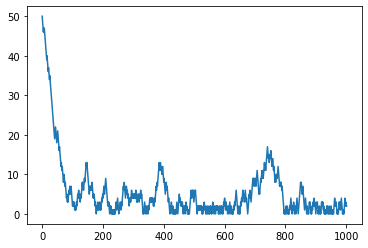

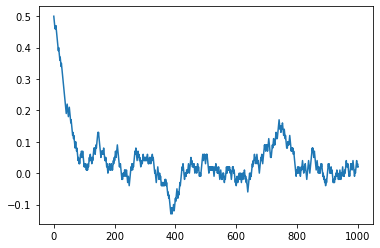

In [103]:
def parametrosSimulacion(kbt = 1, nPasos = 1000):
    definirParametrosGlobales(kBT1=kbt)
    for i in range(nPasos):
        nuevoEstado()
    magnetizacion = []
    energia = []
    for arreglo in estados:
        magnetizacion += [calculoMagnetizacion(arreglo)]
        energia += [energiaInterna(arreglo)]
    return magnetizacion, energia

def buscandoEquilibrio():
    magnetizacion, energia = parametrosSimulacion(kbt=5)
    fig1, ax1 = plt.subplots()
    ax1.plot(magnetizacion)
    fig2, ax2 = plt.subplots()
    ax2.plot(energia)
    plt.show()

buscandoEquilibrio()

In [104]:
def calcularEEquilibrio(matrizEnergias):
    matrizEnergias = matrizEnergias[500:]
    resultado = np.average(matrizEnergias)
    return resultado

def calcularMEquilibrio(matrizMagnetizacion):
    matrizMagnetizacion = matrizMagnetizacion[500:]
    resultado = np.average(matrizMagnetizacion)
    return resultado

In [105]:
def calcularEquilibrio(nSimulaciones, kbt=1):
    U = []
    M = []
    for i in range(nSimulaciones):
        magnetizacion, energia = parametrosSimulacion(kbt = kbt)
        U += [calcularEEquilibrio(energia)]
        M += [calcularMEquilibrio(magnetizacion)]
    resultadoM = np.average(M)
    resultadoU = np.average(U)
    return resultadoM, resultadoU


calcularEquilibrio(20)

(3.690438247011952, 0.007025896414342629)

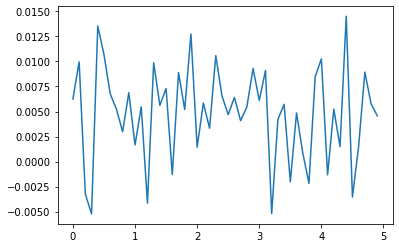

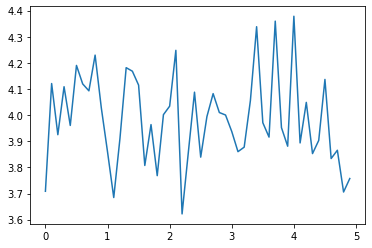

In [87]:
def configuraciones():
    U = []
    M = []
    listaKbt = np.arange(0, 5, 0.1)
    for kb in listaKbt:
        resM, resU = calcularEquilibrio(20, kbt = kb)
        U += [resU]
        M += [resM]
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    ax1.plot(listaKbt, U)
    ax2.plot(listaKbt, M)
    plt.show()
configuraciones()